# The phase portrait

In this section, we introduce the phase portrait representation of an autonomous ODE. This is a plot of the solution *state space*, illustrating the location of any equilibrium points and selected trajectories. We usually do not need to solve the ODE to obtain the phase portrait.

We train ourselves to understand the behaviour from looking at the phase plane, because we can often construct the phase plane even when there is no exact solution.

## A motivating example in 1D
Consider the following ODE, subject to the given initial condition

\begin{equation*}
\dot{x}=2x, \qquad x(0)=x_0.
\end{equation*}

We can solve this problem by separation of variables to obtain a family of solution curves, each corresponding to different values of the initial condition:

\begin{equation*}
x = x_0 e^{2t}.
\end{equation*}

Notice that for this example,

* if $x_0 >0$ then $x$ is always strictly increasing (monotonic increasing)
* if $x_0 <0$ then $x$ is always strictly decreasing (monotonic decrasing)
* if $x_0=0$ then the $x=0$ $\forall t$

 We could infer this behaviour from the ODE without solving it:

 First, we observe that the ODE has an **equilibrium point**, where $\dot{x}=0$. If we supply $x=0$ as our initial condition then the system will remain there forever.

 We then explore what happens around the equilibrium point, as illustrated below. To the right, $\dot{x}$ is positive and to the left, $\dot{x}$ is negative.

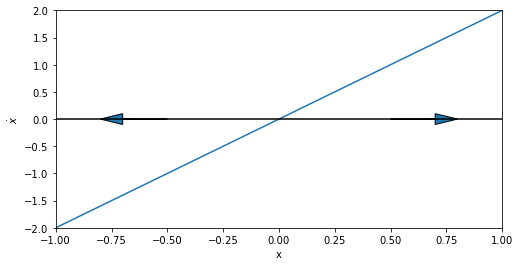

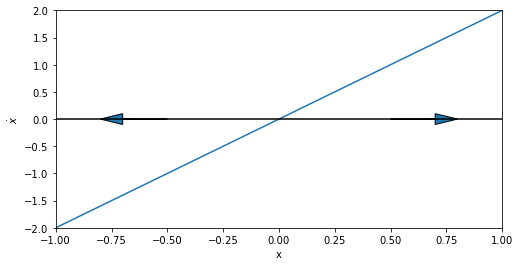

In [1]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt

a=1; k=2; r=1;

x = np.linspace(-1,1)

fig,ax = plt.subplots(figsize=(8,4))
plt.plot(x,2*x)
plt.plot([-1,1],[0,0],'k')
plt.arrow(-0.5, 0, -0.2, 0,head_width=0.2,head_length=0.1)
plt.arrow(0.5, 0, 0.2, 0,head_width=0.2,head_length=0.1)
plt.ylim(-2, 2)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('$\dot{x}$')

glue("simple_fig", fig, display=False)

 ```{glue:} simple_fig
 ```

 We indicate this behaviour on the real number line, which represents the **state space** of possible values that the solution $x$ can take. The direction of change at each point in state space is shown using arrows.

 On $x>0$ the change vector points in the direction of increasing $x$, and on $x<0$ the change vector points in the direction of decreasing $x$. The change vector only swaps sign (direction) at the equilibrium point.

 This provides a qualitative view of the ordinary differential equation, from only a one-dimensional image. We can infer from the state space diagram that the point $x=0$ is an equilibrium point, and moreover that it is **unstable**. If we provide an initial condition near to the equilibrium point, the system will move away from the equilibrium.

 The diagram also provides information about how the system will behave for all possible initial conditions.

```{exercise}
By hand, try to produce a similar sketch of the state space for the following nonlinear ODE, assuming that $a<k$:

 \begin{equation*}
x'=rx\left(1-\frac{x}{k}\right)\left(\frac{x}{a}-1\right)
 \end{equation*}

This famous equation models the Allee effect. What are the equilibrium points of this ODE and which of them are stable/unstable?
```

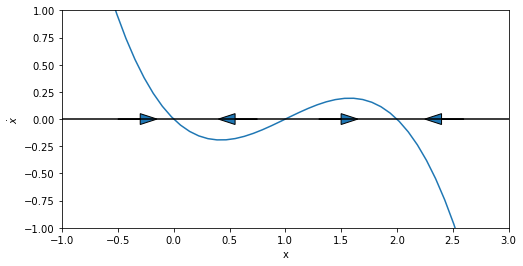

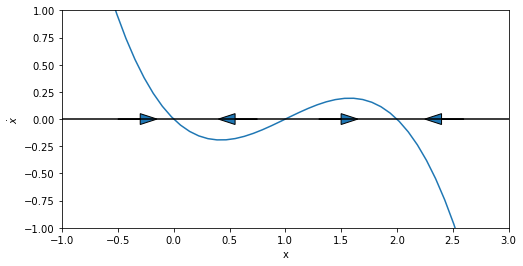

In [2]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt

a=1; k=2; r=1;

x = np.linspace(-1,3)

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(x,r*x*(1-x/k)*(x/a-1))
ax.plot([-1,3],[0,0],'k')
ax.arrow(-0.5, 0, 0.2, 0,head_width=0.1)
ax.arrow(0.75, 0, -0.2, 0,head_width=0.1)
ax.arrow(1.3, 0, 0.2, 0,head_width=0.1)
ax.arrow(2.6, 0, -0.2, 0,head_width=0.1)
ax.set_ylim([-1, 1])
ax.set_xlim([-1,3])
ax.set_xlabel('x')
ax.set_ylabel('$\dot{x}$')

glue("allee_fig", fig, display=False)

````{toggle}

**Solution:**

* The equilibrium point at $x=0$ is stable
* The equilibrium point at $x=a$ is unstable
* The equilibrium point at $x=k$ is stable


```{glue:} allee_fig
```
````

## A motivating example in 2D

We now consider the equation of motion for a simple pendulum, which is given by the following nonlinear second order ODE in which the term with coefficient $k$ represents frictional effects, and the term with coefficient $\omega^2$ represents the weight of the pendulum.

```{math}
\ddot{x}+k\dot{x}+\omega^2\sin(x)=0
```

We may rewrite the equation as a coupled first order system by introducing the variable $y=\dot{x}$, which gives

```{math}
\begin{bmatrix}\dot{x}\\\dot{y}\end{bmatrix} = \begin{bmatrix}y\\-\omega^2\sin(x)-ky\end{bmatrix}
```

In principle, we can solve this system to obtain the angular displacement $x(t)$ and the velocity $y(t)$, and we could plot these time series for given initial conditions. An example is shown below for the case when $k=0$ and $\omega=1$.

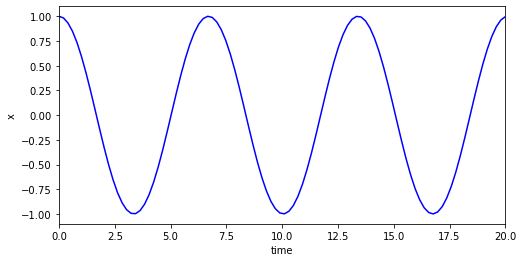

In [3]:
from scipy.integrate import odeint

# Model definition
def pend(X,t,w,k):
  dxdt = X[1]
  dydt = -w**2*np.sin(X[0])-k*X[1]
  return [dxdt, dydt]

t0=0; X0=[1,0] #initial conditions for t,x,y
w=1; k=0

t = np.linspace(0,20,100)    # time points

# solve ODE
X = odeint(pend,X0,t,args=(w,k))

# plot results
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(t,X[:,0],'b')
plt.ylabel('x')
plt.xlabel('time')
plt.xlim([0,20])
plt.show()

However, if we want to understand how the system behaves for a range of initial conditions or when subjected to a small perturbation, we would need to re-solve and compare the two solutions. This is inconvenient.

We can make better progress by again working in state space. This time, there are two state variables, $x$ and $y$ and so the state space is $\mathbb{R}^2$.

This makes sense, because to solve a second order ODE we need to have two initial conditions. In this case we have one condition for the initial angular displacement $x(0)$ and one condition for the initial angular velocity $y(0)$. A plot of some solution trajectories are shown below.

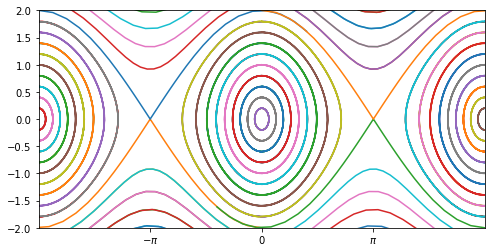

In [4]:
plt.figure(figsize=(8,4))
for i in np.arange(-4,4,0.2):
  for j in [-2*np.pi,0,2*np.pi]:
    X0=[j,i]
    sol = odeint(pend,X0, t,args=(w,k))
    plt.plot(sol[:,0],sol[:,1])

plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-2,2)
plt.xticks([-np.pi,0,np.pi],['$-\pi$','0','$\pi$'])
plt.show()

```{admonition} Phase portrait
:class: theorem
A plot showing a region of state space together with any equilibrium points and some indicative trajctories is called a phase portrait.
```

We can also infer the solution trajectories by plotting the vector field $(\dot{x},\dot{y})$ in state space. Since there is no explicit time dependence on the right-hand side, the change vectors remain static and the solution will follow a trajectory tangent to them.

### No damping

First we will take $k=0$, so there are no losses due to friction. The phase portrait is shown below.

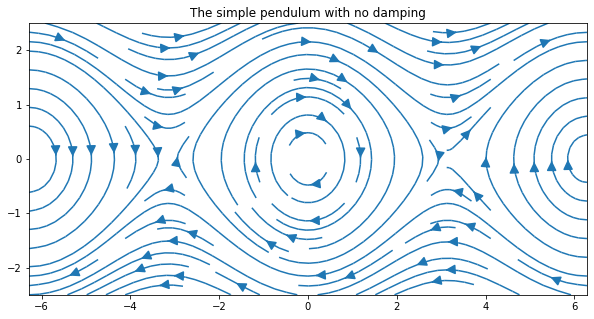

In [5]:
x=np.linspace(-2*np.pi,2*np.pi,100)
y=np.linspace(-2.5,2.5,100)

[X,Y]=np.meshgrid(x,y)

plt.figure(figsize=(10,5))
#define the vector field values at each point
(U,V)=(Y,-np.sin(X))    
plt.title('The simple pendulum with no damping')
plt.streamplot(X,Y,U,V,arrowsize=2)

plt.show()

We can immediately locate and classify the equilibrium points. To satisfy the conditions $\dot{x}=\dot{y}=0$, we have

\begin{equation}
x=n\pi, \quad y=0, \qquad n\in\mathbb{Z}.
\end{equation}

**Stationary point at $(0,0)$**

This point corresponds to the pendulum in a stationary downward vertical position. We can see from the diagram that the point is encircled by closed orbits, which represents periodic motion. If we intialise the pendulum in a state close the equilibrium it will oscillate, following a repeating circular trajectory forever. This type of equilibrium point is called a "centre".

**Stationary point at $(\pm\pi,0)$**

This point corresponds to the pendulum in a stationary upward vertical position. If the pendulum is started at the equilibrium point it will remain there, but if it is started from a perturbed position close to the upward vertical, it will move away. As there is no damping, the subsequent motion depends on whether the pendulum is released from rest or given a push. If it is released from rest close to the upward vertical it will perform closed oscillations. If it is given a push it may perform repeated full rotations. This type of equilibrium point is called a "saddle".


### With damping

Now we add a small amount of damping $k=0.4$. The phase portrait is shown below.

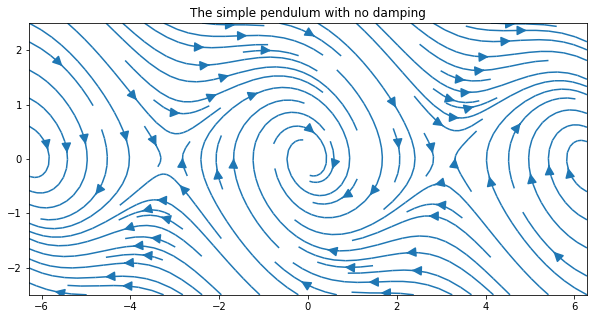

In [6]:
x=np.linspace(-2*np.pi,2*np.pi,100)
y=np.linspace(-2.5,2.5,100)

[X,Y]=np.meshgrid(x,y)

plt.figure(figsize=(10,5))
#define the vector field values at each point
k=0.4
(U,V)=(Y,-np.sin(X)-k*Y)        
plt.title('The simple pendulum with no damping')
plt.streamplot(X,Y,U,V,arrowsize=2)

plt.show()

The addition of damping does not change the locations of the equilibria, but it dos affect their stability. All solutions decay gradually towards the equilibrium at $(0,0)$. This is represented by an inward-spiralling trajectory on the phase diagram. The pendulum oscillates with decaying amplitude.


## Side note

Whilst is not generally practical to find an explicit expression $y(x)$ for the phase paths, we can sometimes do it. For instance, if we consider the undamped pendulum case then the paths satisfy

\begin{equation*}
\frac{\mathrm{d}y}{\mathrm{d}x}=\frac{\dot{y}}{\dot{x}}=-\frac{\omega^2\sin(x)}{y}.
\end{equation*}

Solving by separation gives the following result where $k$ is an arbitrary constant

```{math}
y=\pm \sqrt{2}\omega \sqrt{k+\cos(x)}.
```

For $k>1$ we have open orbits, and for $-1<k<1$ we have closed orbits (periodic motion). The case $k=1$ divides between qualitiatively different behaviours. It is called the separatrix.

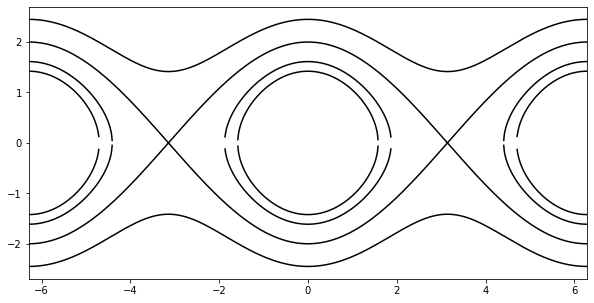

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import numpy.ma as ma

x=np.linspace(-2*np.pi,2*np.pi,1000)

plt.figure(figsize=(10,5))
#define the vector field values at each point

v1=np.sqrt(2)*np.sqrt(1+np.cos(x))
v2=np.sqrt(2)*np.sqrt(2+np.cos(x))
v3=[cmath.sqrt(2*(0.3+k)) for k in np.cos(x)]
v3 = ma.masked_array(np.real(v3), mask=(np.imag(v3)!=0))
v4=[cmath.sqrt(2*(0.01+k)) for k in np.cos(x)]
v4 = ma.masked_array(np.real(v4), mask=(np.imag(v4)!=0))

plt.plot(x,+v1,'k')
plt.plot(x,-v1,'k')
plt.plot(x,+v2,'k')
plt.plot(x,-v2,'k')
plt.plot(x,+v3,'k')
plt.plot(x,-v3,'k')
plt.plot(x,+v4,'k')
plt.plot(x,-v4,'k')
plt.xlim([-2*np.pi,2*np.pi])
plt.show()

## Exercise

```{exercise}
The following system is a model of glycolysis, in which $s$ represents the concentration of F6P (fructose-6-phosphate) and $p$ represents the concentration of ADP (adenosine diphosphate):

\begin{align*}
\dot{s}&=v_0 - c s p^2\\
\dot{p}&=c s p^2 - k p
\end{align*}

Produce a phase portrait for this system for the case where $v_0=1$, $k=1$, $c=1.1$, illustrating the behaviour of the solution in the vicinity the equilibrium point.

Try illustrating the behaviour by plotting the vector field and also by plotting some solution trajectories for different initial conditions.

Also try changing the value of $c$ to 0.9. How do the trajectories in the vicinity of the stationary point change?
```